This notebook will be used to conduct exploratory data analysis (EDA) on our data set containing all stats. Note these graphs use our dataset wich only dates back to 1987.

In [39]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import numpy as np
import random

In [2]:
all_stats = pd.read_csv('all_stats.csv')

In [3]:
all_stats.head(5)

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PF,PTS,Year,Pts Won,Pts Max,Share,Team,Wins,Losses,W%
0,0,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,...,2.2,10.8,1987,0.0,780.0,0.0,Los Angeles Lakers,65,17,0.79268
1,1,Adrian Branch,SF,23,LAL,32,0,6.8,1.5,3.0,...,1.2,4.3,1987,0.0,780.0,0.0,Los Angeles Lakers,65,17,0.79268
2,2,Billy Thompson,SF,23,LAL,59,0,12.9,2.4,4.4,...,2.5,5.6,1987,0.0,780.0,0.0,Los Angeles Lakers,65,17,0.79268
3,3,Byron Scott,SG,25,LAL,82,82,33.3,6.8,13.8,...,2.0,17.0,1987,0.0,780.0,0.0,Los Angeles Lakers,65,17,0.79268
4,4,James Worthy,SF,25,LAL,82,82,34.4,7.9,14.7,...,2.5,19.4,1987,0.0,780.0,0.0,Los Angeles Lakers,65,17,0.79268


In [4]:
del all_stats['Unnamed: 0']

In [5]:
all_stats=pd.DataFrame(all_stats)

In [6]:
#Filtered stats dataframe so we can look at players who have played at least 15 games in the season
filtered_stats = all_stats[all_stats['G'] > 15]

In [7]:
filtered_stats.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Wins,Losses,W%
count,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,12951.000000,...,14438.000000,14438.000000,14438.000000,14438.00000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000
mean,26.761116,59.481438,29.392714,21.995276,3.441834,7.544965,0.450316,0.584839,1.661733,0.275459,...,1.309059,2.005132,9.156240,2006.10320,7.401572,1118.880039,0.006663,39.907328,40.197049,0.498092
std,4.188790,19.309233,29.470924,9.464800,2.212145,4.629010,0.064620,0.706457,1.863027,0.153701,...,0.798520,0.766397,6.014455,10.54451,70.726334,140.622654,0.063050,12.794224,12.765391,0.154530
min,18.000000,16.000000,0.000000,1.900000,0.100000,0.300000,0.077000,0.000000,0.000000,0.000000,...,0.000000,0.100000,0.100000,1987.00000,0.000000,780.000000,0.000000,7.000000,9.000000,0.106060
25%,23.000000,46.000000,2.000000,14.200000,1.700000,3.900000,0.411000,0.000000,0.100000,0.200000,...,0.700000,1.400000,4.500000,1997.00000,0.000000,1010.000000,0.000000,30.000000,30.000000,0.378050
50%,26.000000,64.000000,17.000000,21.600000,2.900000,6.500000,0.446000,0.300000,1.000000,0.321000,...,1.100000,2.000000,7.700000,2007.00000,0.000000,1180.000000,0.000000,41.000000,39.000000,0.512200
75%,30.000000,77.000000,58.000000,30.000000,4.800000,10.400000,0.486000,1.000000,2.800000,0.371000,...,1.800000,2.500000,12.600000,2015.00000,0.000000,1240.000000,0.000000,50.000000,49.000000,0.611110
max,43.000000,85.000000,83.000000,43.700000,13.400000,27.800000,0.819000,5.300000,13.200000,1.000000,...,5.700000,4.600000,37.100000,2023.00000,1310.000000,1310.000000,1.000000,73.000000,72.000000,0.890240


Text(0.5, 1.0, 'Histogram of Points Per Game')

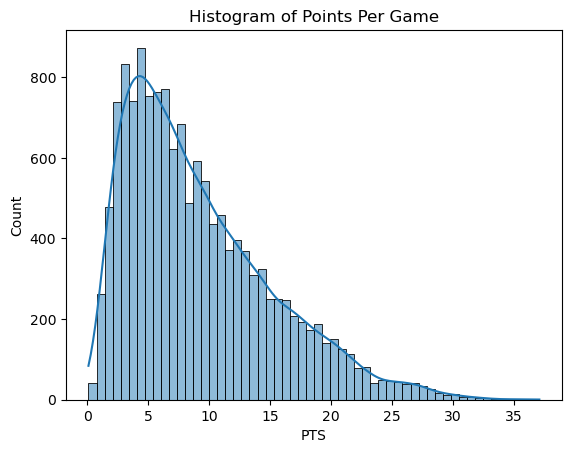

In [8]:
sns.histplot(data=filtered_stats, x='PTS', kde=True)
plt.title('Histogram of Points Per Game')

Appears Points Per Game is right-skewed

Text(0.5, 1.0, 'Histogram of Field Goal Percentage')

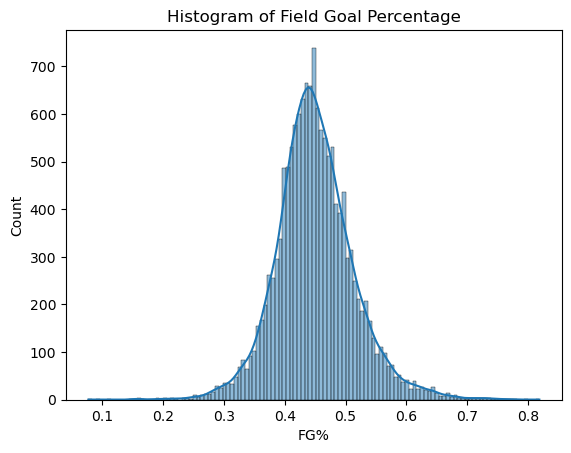

In [9]:
sns.histplot(data=filtered_stats, x='FG%', kde=True)
plt.title('Histogram of Field Goal Percentage')

Text(0, 0.5, 'Field Goals Attempted')

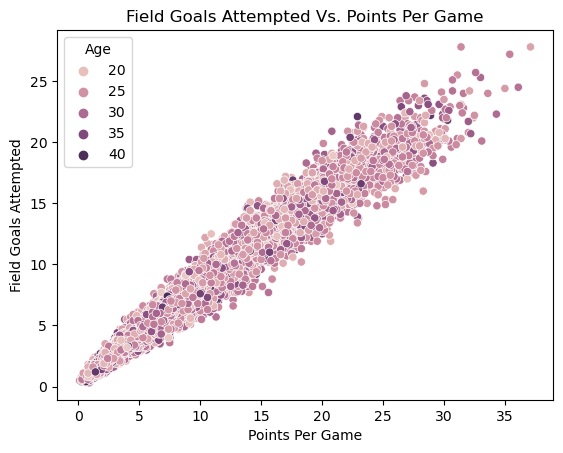

In [10]:
ax = sns.scatterplot(data=filtered_stats, x='PTS', y='FGA',hue='Age')
ax.set_title('Field Goals Attempted Vs. Points Per Game')
ax.set_xlabel('Points Per Game')
ax.set_ylabel('Field Goals Attempted')

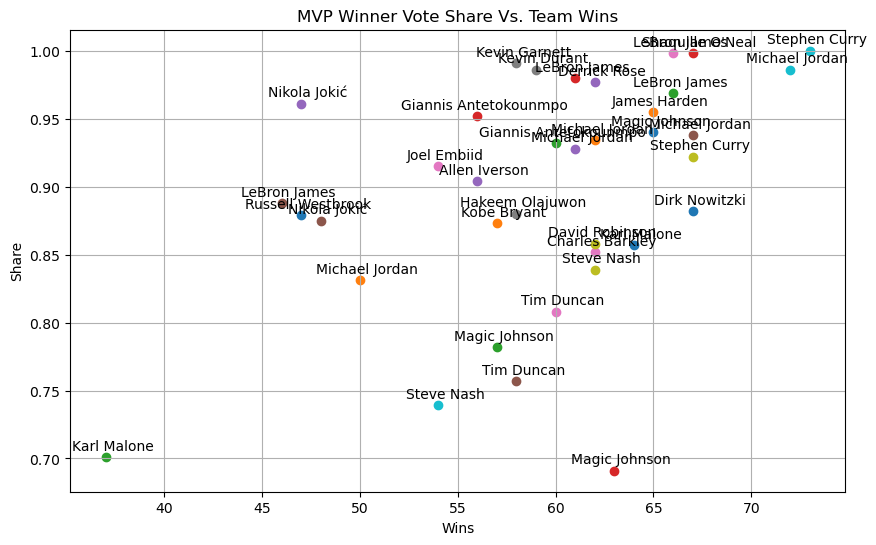

In [36]:
highest_share_players = all_stats.groupby('Year').apply(lambda group: group.loc[group['Share'].idxmax()])

plt.figure(figsize=(10, 6))
for idx, row in highest_share_players.iterrows():
    plt.scatter(row['Wins'], row['Share'], label=row['Year'])
    plt.annotate(row['Player'], (row['Wins'], row['Share']), textcoords="offset points", xytext=(5,5), ha='center')
plt.xlabel('Wins')
plt.ylabel('Share')
plt.title('MVP Winner Vote Share Vs. Team Wins')
plt.grid(True)
plt.show()

It appears  most of the players that ended up winning the MVP were on teams with over 55 wins. Only one players has every won MVP on a losing team. We can also see that there has only been one team to ever win MVP unanimously. This was Steph Curry in the 2015-16 season. Both LeBron James and Shaquille O'Neal came very close to accomplishing this. Sorry the text is overlapping. I will look into fixing this once I finish the machine learning section of the project.

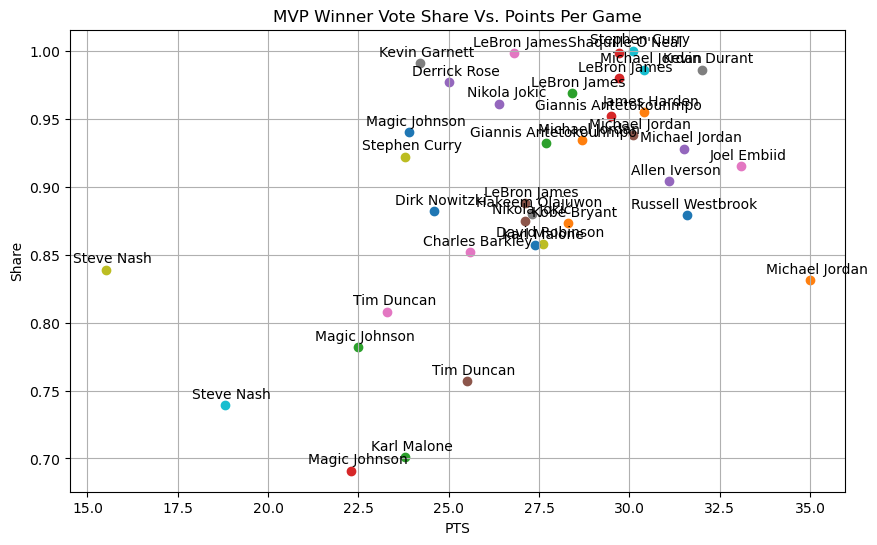

In [42]:
highest_share_players = all_stats.groupby('Year').apply(lambda group: group.loc[group['Share'].idxmax()])

plt.figure(figsize=(10, 6))
for idx, row in highest_share_players.iterrows():
    plt.scatter(row['PTS'], row['Share'], label=row['Year'])
    plt.annotate(row['Player'], (row['PTS'], row['Share']), textcoords="offset points", xytext=(5,5), ha='center')


plt.xlabel('PTS')
plt.ylabel('Share')
plt.title('MVP Winner Vote Share Vs. Points Per Game')
plt.grid(True)
plt.show()

We can see the majority of players to win MVP score at least 22.5 PPG.

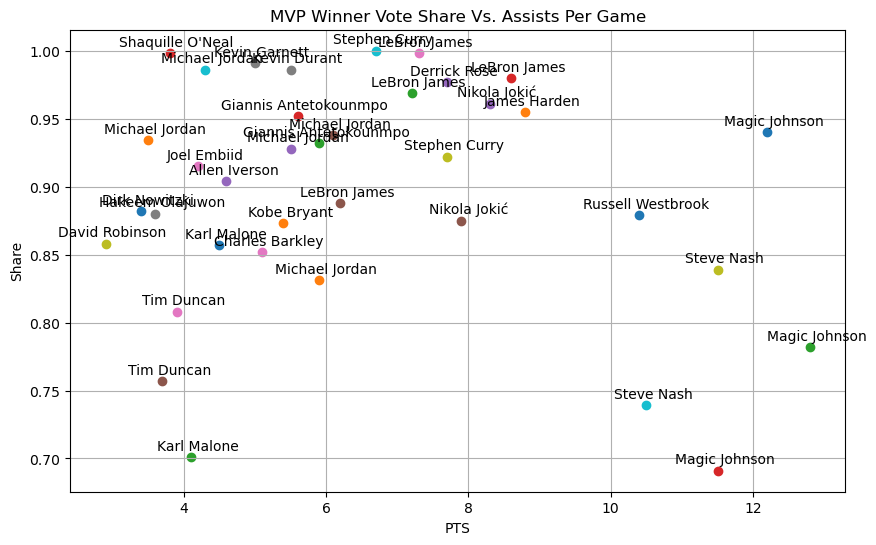

In [43]:
highest_share_players = all_stats.groupby('Year').apply(lambda group: group.loc[group['Share'].idxmax()])

plt.figure(figsize=(10, 6))
for idx, row in highest_share_players.iterrows():
    plt.scatter(row['AST'], row['Share'], label=row['Year'])
    plt.annotate(row['Player'], (row['AST'], row['Share']), textcoords="offset points", xytext=(5,5), ha='center')


plt.xlabel('PTS')
plt.ylabel('Share')
plt.title('MVP Winner Vote Share Vs. Assists Per Game')
plt.grid(True)
plt.show()

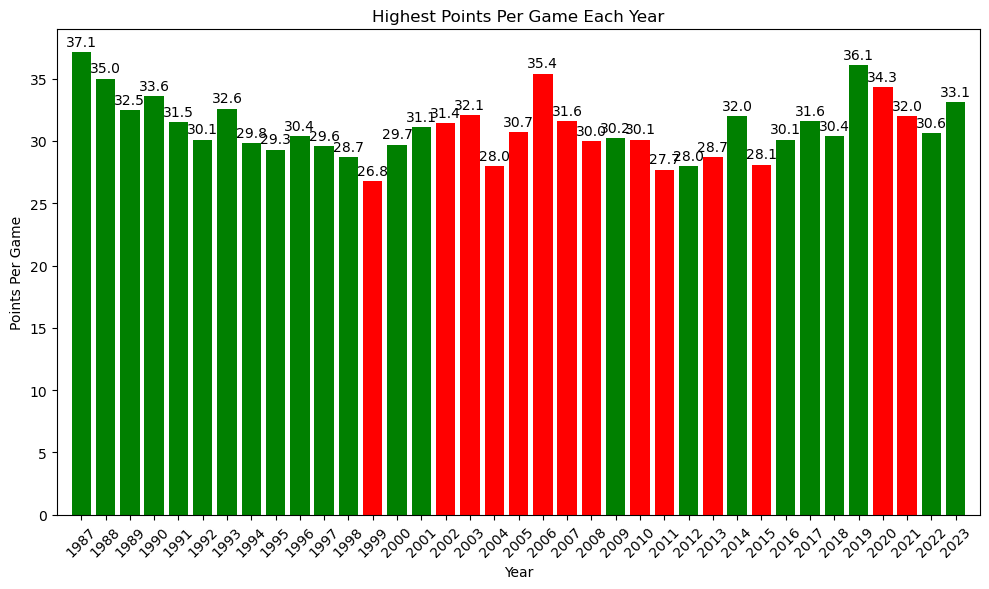

In [49]:
highest_scoring_by_year = filtered_stats.groupby('Year').apply(lambda x: x.sort_values('PTS', ascending=False).head(1))
colors = ['green' if share >= 0.5 else 'red' for share in highest_scoring_by_year['Share']]

plt.figure(figsize=(10, 6))
plt.bar(highest_scoring_by_year['Year'], highest_scoring_by_year['PTS'], color=colors)
plt.xlabel('Year')
plt.ylabel('Points Per Game')
plt.xticks(range(1987, 2024), rotation=45)
plt.xlim(1986, 2024)
plt.title('Highest Points Per Game Each Year') 
plt.grid(False)
plt.tight_layout()

for i, value in enumerate(highest_scoring_by_year['PTS']):
    plt.text(highest_scoring_by_year['Year'].iloc[i], value + 0.5, str(value), ha='center', color='black')


This graph shows the highest scoring player by PPG in each season. If the bar is green it means the player won the MVP award and if it is red they did not. Below you will find similar graphs for assists and rebounds.

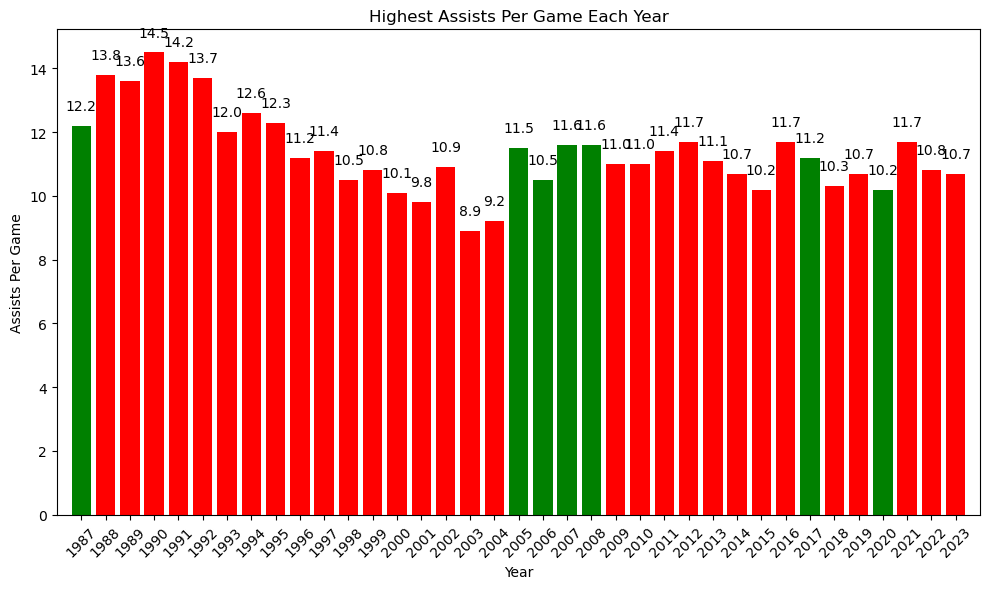

In [51]:
highest_assists = filtered_stats.groupby('Year').apply(lambda x: x.sort_values('AST', ascending=False).head(1))
colors = ['green' if share >= 0.5 else 'red' for share in highest_assists['Share']]

plt.figure(figsize=(10, 6))
plt.bar(highest_assists['Year'], highest_assists['AST'], color=colors)
plt.xlabel('Year')
plt.ylabel('Assists Per Game')
plt.xticks(range(1987, 2024), rotation=45)
plt.xlim(1986, 2024)
plt.title('Highest Assists Per Game Each Year')
plt.grid(False)
plt.tight_layout()

# Adding data labels on top of bars
for i, value in enumerate(highest_assists['AST']):
    plt.text(highest_assists['Year'].iloc[i], value + 0.5, str(value), ha='center', color='black')


A lot more red on this graph. It would appear as being the leader in PPG is more important than Assists Per Game (APG) for MVP voting.

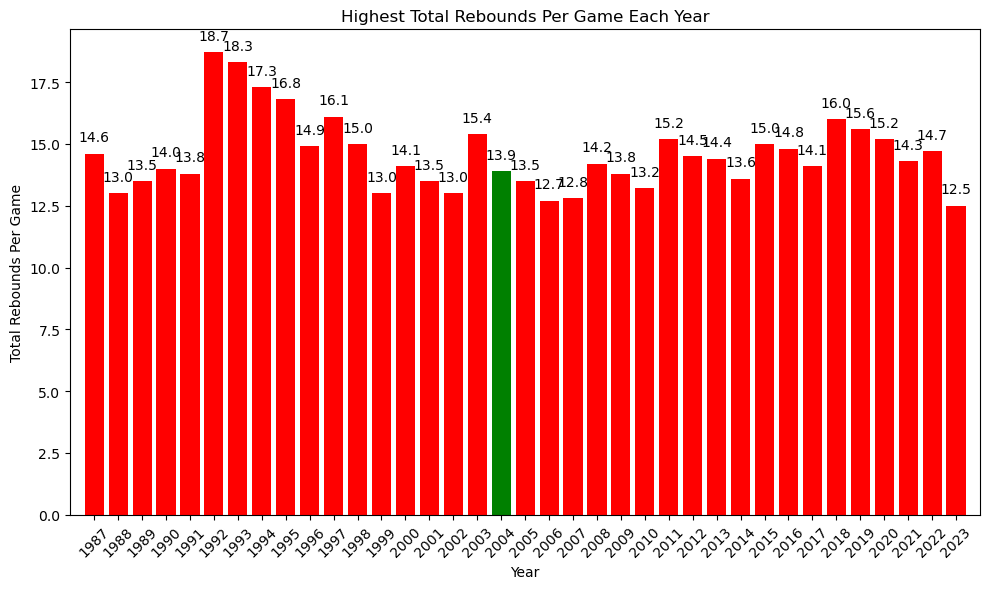

In [52]:
highest_rebounds = filtered_stats.groupby('Year').apply(lambda x: x.sort_values('TRB', ascending=False).head(1))
colors = ['green' if share >= 0.5 else 'red' for share in highest_rebounds['Share']]

plt.figure(figsize=(10, 6))
plt.bar(highest_rebounds['Year'], highest_rebounds['TRB'], color=colors)
plt.xlabel('Year')
plt.ylabel('Total Rebounds Per Game')
plt.xticks(range(1987, 2024), rotation=45)
plt.xlim(1986, 2024)
plt.title('Highest Total Rebounds Per Game Each Year')
plt.grid(False)
plt.tight_layout()

for i, value in enumerate(highest_rebounds['TRB']):
    plt.text(highest_rebounds['Year'].iloc[i], value + 0.5, str(value), ha='center', color='black')

Only one time (in our data's timeframe) has the league leader in rebounds per games won MVP! Shoutout to Kevin Garnett.

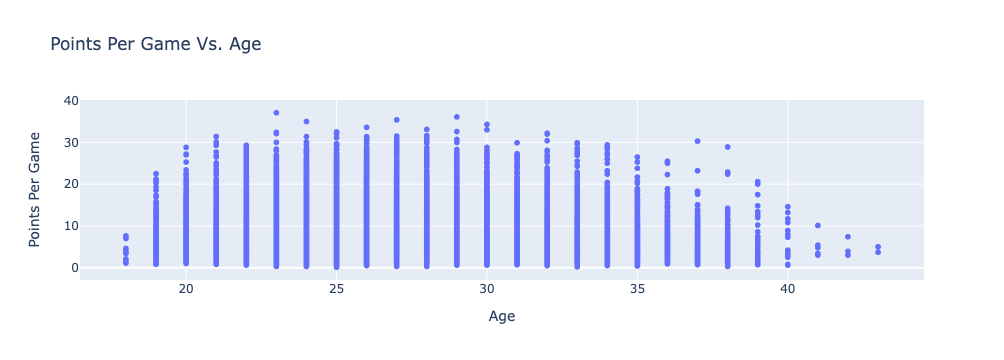

In [16]:
#PPG Vs. Age
fig = px.scatter(filtered_stats, x='Age', y='PTS', 
                 title='Points Per Game Vs. Age',
                 labels={'Age': 'Age', 'PTS': 'Points Per Game'},
                 hover_name='Player')
fig.show()

# Correlation

/var/folders/gg/1408gykx50d9d1h_6m7hsl480000gn/T/ipykernel_1636/1179126639.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



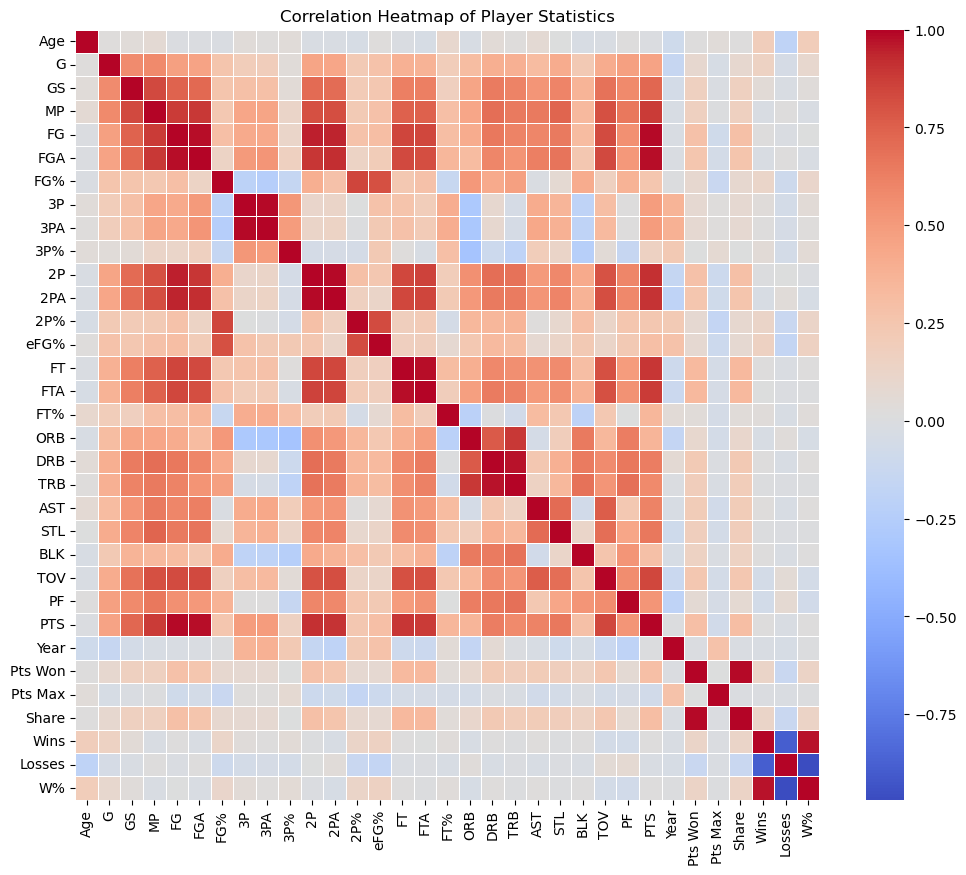

In [17]:
#All statistics correlation matrix
correlation_matrix = filtered_stats.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Player Statistics')
plt.show()

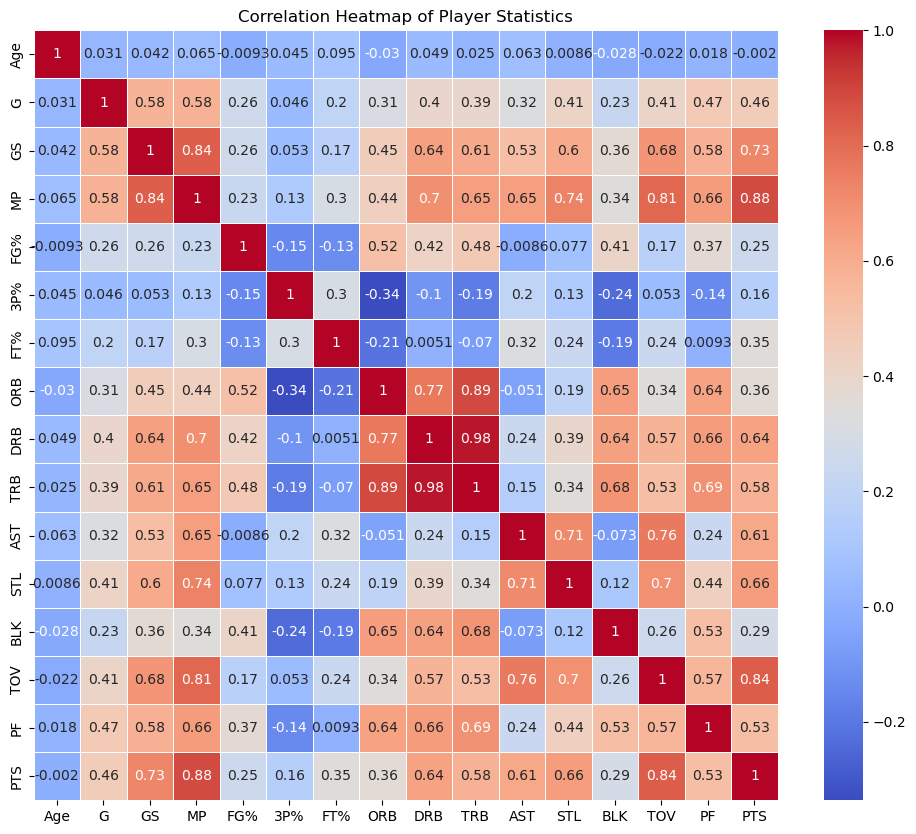

In [18]:
#Select statistics correlation matrix
player_stats = filtered_stats[['Age', 'G', 'GS', 'MP', 'FG%', '3P%', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
correlation_matrix = player_stats.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Player Statistics')
plt.show()

/var/folders/gg/1408gykx50d9d1h_6m7hsl480000gn/T/ipykernel_1636/3770482877.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



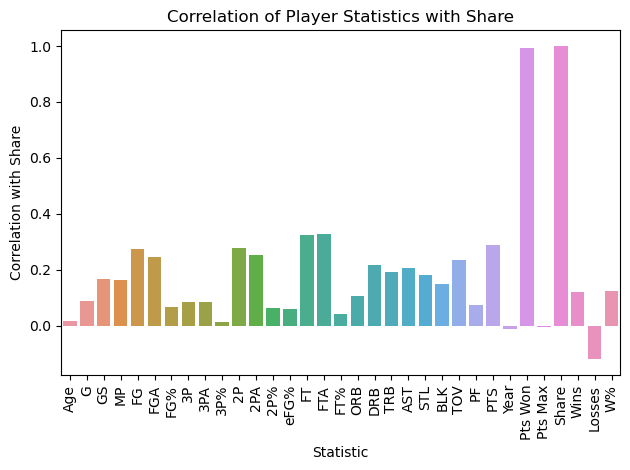

In [19]:
#Correlation of Player Statistics with Share
correlation_values = all_stats.corr()['Share']

sns.barplot(x=correlation_values.index, y=correlation_values.values)
plt.xticks(rotation=90)
plt.xlabel('Statistic')
plt.ylabel('Correlation with Share')
plt.title('Correlation of Player Statistics with Share')
plt.tight_layout()
plt.show()